In [ ]:
'''
Course Name: Pattern Recognition Lab
Course Number: CSE 4214
Experiment no. 3: Implementing Minimum Error Rate Classifier

Name: Humaira Zahin Mauni
Section: A1
ID: 160104012
'''

In [2]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.model_selection import train_test_split 
import math

In [4]:
## Q1 ##
uploaded = files.upload() 

Saving Data_csv.csv to Data_csv.csv


In [5]:
df = pd.read_csv('Data_csv.csv')
df.columns = ['x1', 'x2', 'label']
train, test = train_test_split(df, test_size=0.4, random_state=42, shuffle=True)

In [6]:
## Q2 ##

mean = train.groupby("label").mean()
cov = train.groupby("label").cov()
prob = train.groupby("label").count()/train['label'].count()

m = mean.to_numpy();
v = np.ones((2, 2))
v[0][0] = cov['x1'][1]['x1']
v[0][1] = cov['x2'][1]['x2']
v[1][0] = cov['x1'][2]['x1']
v[1][1] = cov['x2'][2]['x2']
prior = prob.iloc[:, 0].values

print("Mean:\n", m)
print("\nProbability:\n", prior)
print("\nCovariance:\n",v)

Mean:
 [[ 1.90192222  4.05612963]
 [ 7.75338485 10.02583636]]

Probability:
 [0.45 0.55]

Covariance:
 [[0.24668389 0.30238914]
 [0.19585233 0.15089053]]


In [7]:
## Q3 ##

def calc_likelihood(m, v, x):
    likelihood = np.ones(2)
    for i in range(0, 2):
        product = 1
        for j in range(0, 2):
            product = product * (1/math.sqrt(2*3.14*v[i][j])) * math.exp(-0.5* math.pow((x[j] - m[i][j]),2)/v[i][j])
        likelihood[i] = product
    return likelihood

In [8]:
def Gaussian(X, y, x):  
    likelihood = calc_likelihood(m, v, x)
    posterior = np.ones(2)
    for i in range(0, 2):
        posterior[i] = (likelihood[i] * prior[i])
    prediction = int(posterior.argmax()) + 1
    return m, v, prior, likelihood, posterior, prediction

In [11]:
pred_no = test.shape[0]
X_train = np.array(train.iloc[:,[0,1]])
y_train = np.array(train['label'])
y_pred = np.zeros((pred_no,1))
x_test = np.array(test.iloc[:,[0,1]])
y_test = np.array(test['label'])
accuracy = 0
for i in range(0, pred_no):
  m, v, prior, likelihood, posterior, y_pred[i] = Gaussian(X_train, y_train, x_test[i])
  if y_pred[i] == y_test[i]:
    accuracy+= 1
print("Accuracy = ", 100 * (accuracy/pred_no), "%")


Accuracy =  100.0 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


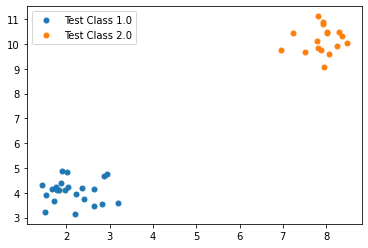

In [12]:
## Q4 ##

test['predicted label'] = y_pred
groups =  test.groupby('predicted label')

fig, ax = plt.subplots()
for name, group in groups:
    name = 'Test Class ' + str(name)
    ax.plot(group.x1, group.x2, marker='o', linestyle='', ms=5, label=name)
ax.legend()

plt.show()